In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from opqua.model import Model

# [Opqua](https://github.com/pablocarderam/opqua)

## Most basic usage

Simulating time: 72.53215389518974, event: RECOVER_HOST
Simulating time: 100.11661192379708 END
Saving file...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Batch computation too fast (0.19581198359680177s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Batch computation too fast (0.012181758880615234s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  27 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Batch computation too fast (0.013608694076538086s.) Setting batch_size=8.
[Parallel(n_jobs=8)]: Done  76 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 120 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.0191802978515625s.) Setting batch_size=16.
[Parallel(n_jobs=8)]: Done 224 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.027

...file saved.


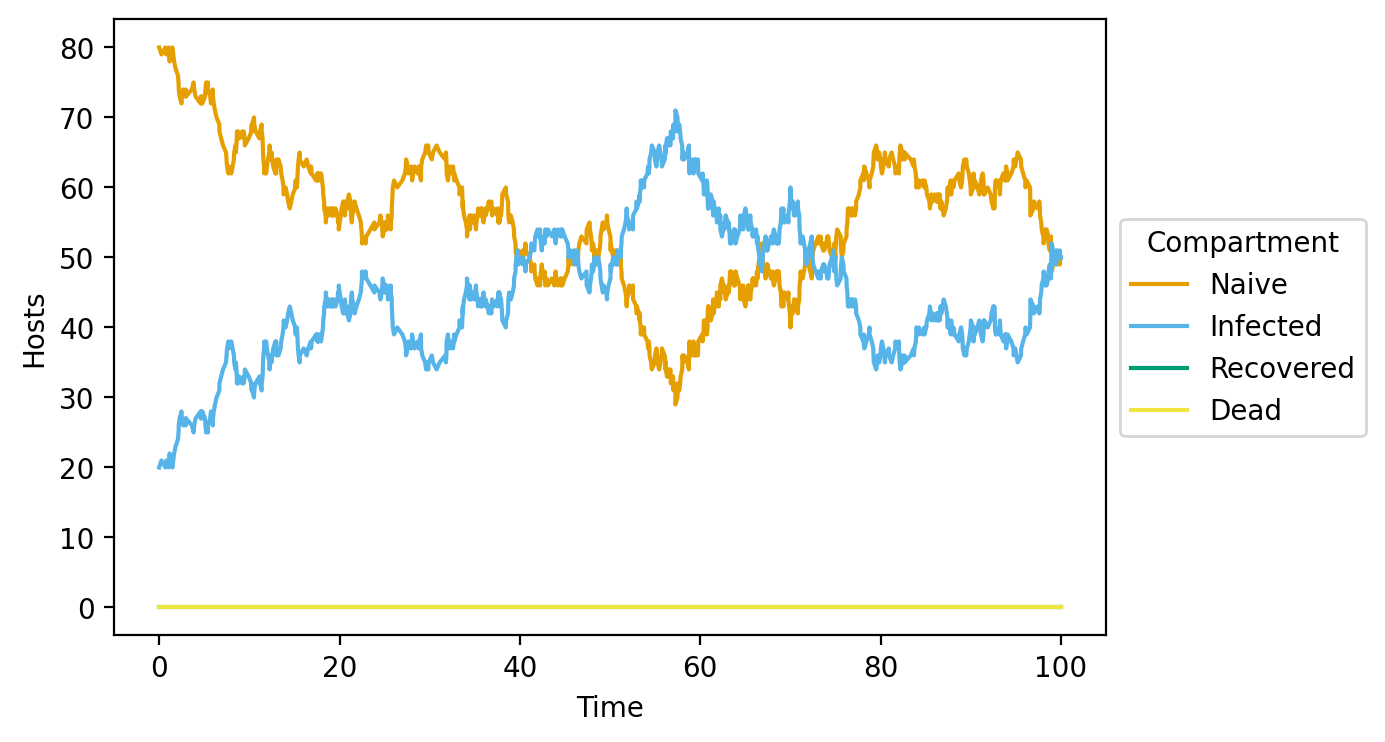

In [2]:
my_model = Model()                                                      # Create a new Model Object
my_model.newSetup('my_setup', preset='host-host')                       # Creates a new Setup dictionary 
my_model.newPopulation('my_population', 'my_setup', num_hosts=100)
my_model.addPathogensToHosts( 'my_population',{'AAAAAAAAAA':20} )
my_model.run(0,100)
data = my_model.saveToDataFrame('my_model.csv')
graph = my_model.compartmentPlot('my_model.png', data)

## Evolution

Host-host transmission model with susceptible and infected hosts in a single population scenario, illustrating pathogen evolution through de novo mutations and intra-host competition.

When two pathogens with different genomes meet in the same host (or vector), the pathogen with the most fit genome has a higher probability of being transmitted to another host (or vector). In this case, the transmission rate does NOT vary according to genome. Once an event occurs, however, the pathogen with higher fitness has a higher likelihood of being transmitted.

Here, we define a landscape of stabilizing selection where there is an optimal genome and every other genome is less fit, but fitness functions can be defined in any arbitrary way (accounting for multiple peaks, for instance, or special cases for a specific genome sequence).

In [3]:
my_optimal_genome = 'BEST' # Define an optimal genome

### Creating a new Model object

In [4]:
model = Model()

### Defining a custom fitness function for the host
Fitness functions must take in 1 argument and return a positive number as a fitness value. Here, we take advantage of one of the preset functions, but you can define it any way you want!

In [5]:
def myHostFitness(genome):
    return Model.peakLandscape(
        genome, peak_genome=my_optimal_genome, min_value=1e-10
        )   # Stabilizing selection: any deviation from the "optimal genome"
            # sequence results in an exponential decay in fitness to the min_fitness
            # value at the maximum possible distance. Here we use strong selection,
            # with a very low minimum fitness.

### Defining our Setup

In [6]:
model.newSetup(                 # Create a new setup dictionary
    'my_setup',
        # Name of the setup (a dictionary)
    preset='host-host',
        # Use default 'host-host' parameters. The other preset is 'vector-borne'
    possible_alleles='ABDEST',
        # Define "letters" in the "genome", or possible alleles for each locus.
        # Each locus can have different possible alleles if you define this
        # argument as a list of strings, but here, we take the simplest
        # approach.
    num_loci=len(my_optimal_genome),
        # Define length of "genome", or total number of alleles.
    fitnessHost=myHostFitness,
        # Assign the fitness function we created (could be a lambda function)
    mutate_in_host=5e-2
        # Modify de novo mutation rate of pathogens when in host to get some
        # evolution!
    )

### Creating a population in our model

In [7]:
model.newPopulation(            # Create a new Population object with setup parameters
    'my_population',
        # unique identifier for this population in the model 
    'my_setup', 
        # setup object with parameters for this population
    num_hosts=100
        # number of hosts to initialize population with
    )

### Manipulating hosts and vectors in the population
We will start off the simulation with a suboptimal pathogen genome, "BADD". Throughout the course of the simulation, we should see this genome be outcompeted by more optimal pathogen genotypes, culminating in the optimal genome, "BEST", which outcompetes all others.

In [8]:
model.addPathogensToHosts(    # Add specified pathogens to random hosts
    'my_population',
        # ID of population to be modified
    {'BADD':10} 
        # Dictionary containing pathogen genomes to add as keys and 
        # number of hosts each one will be added to as values
    )

### Running the simulation

In [9]:
model.run(  # Simulate model for a specified time between two time points
    0,      # initial time point
    200     # final time point
    )

Simulating time: 65.74769783720456, event: CONTACT_HOST_HOST
Simulating time: 118.49012508662969, event: CONTACT_HOST_HOST
Simulating time: 177.2231594992668, event: CONTACT_HOST_HOST
Simulating time: 200.15408588542815 END


## Output data manipulation and visualization

In [10]:
data = model.saveToDataFrame(   
        # Creates a pandas Dataframe in long format with the given model history, 
        # with one host or vector per simulation time in each row
    'fitness_function_mutation_example.csv' # file path and name to save model data
    )

Saving file...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.0046083927154541016s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Batch computation too fast (0.009400367736816406s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Batch computation too fast (0.014424800872802734s.) Setting batch_size=8.
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Batch computation too fast (0.015554189682006836s.) Setting batch_size=16.
[Parallel(n_jobs=8)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Batch computation too fast (0.024990081787109375s.) Setting batch_size=32.
[Parallel(n_job

...file saved.


1 / 128 genotypes processed.
2 / 128 genotypes processed.
3 / 128 genotypes processed.
4 / 128 genotypes processed.
5 / 128 genotypes processed.
6 / 128 genotypes processed.
7 / 128 genotypes processed.
8 / 128 genotypes processed.
9 / 128 genotypes processed.
10 / 128 genotypes processed.
11 / 128 genotypes processed.
12 / 128 genotypes processed.
13 / 128 genotypes processed.
14 / 128 genotypes processed.
15 / 128 genotypes processed.
16 / 128 genotypes processed.
17 / 128 genotypes processed.
18 / 128 genotypes processed.
19 / 128 genotypes processed.
20 / 128 genotypes processed.
21 / 128 genotypes processed.
22 / 128 genotypes processed.
23 / 128 genotypes processed.
24 / 128 genotypes processed.
25 / 128 genotypes processed.
26 / 128 genotypes processed.
27 / 128 genotypes processed.
28 / 128 genotypes processed.
29 / 128 genotypes processed.
30 / 128 genotypes processed.
31 / 128 genotypes processed.
32 / 128 genotypes processed.
33 / 128 genotypes processed.
34 / 128 genotypes 

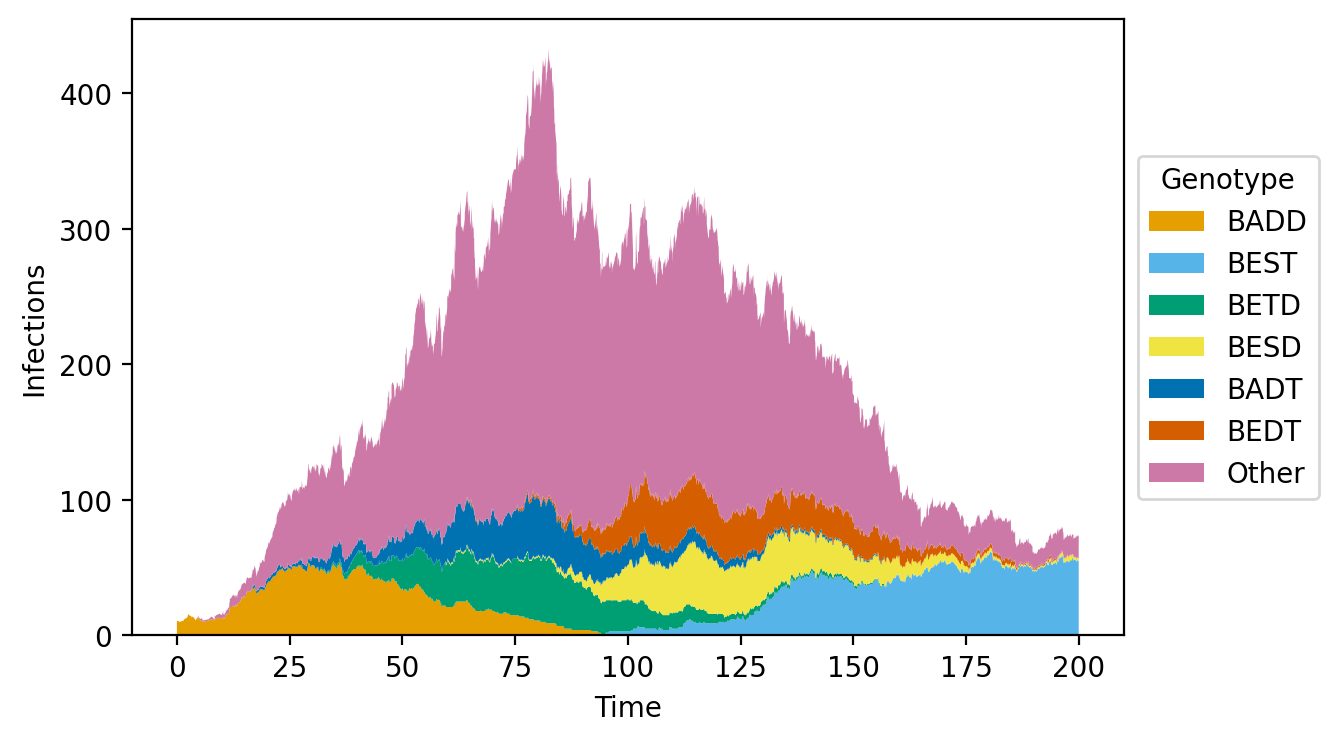

In [11]:
graph_composition = model.compositionPlot(
        # Create a plot to track pathogen genotypes across time
    'fitness_function_mutation_example_composition.png', 
        # file path, name, and extension to save plot under
    data,
        # dataframe with model history as produced by saveToDf function
    num_top_sequences=6,
        # Track the 6 most represented genomes overall (remaining genotypes are
        # lumped into the "Other" category).
    track_specific_sequences=['BADD']
        # Include the initial genome in the graph if it isn't in the top 6.
    )

/home/acs98/miniconda3/envs/opqua/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


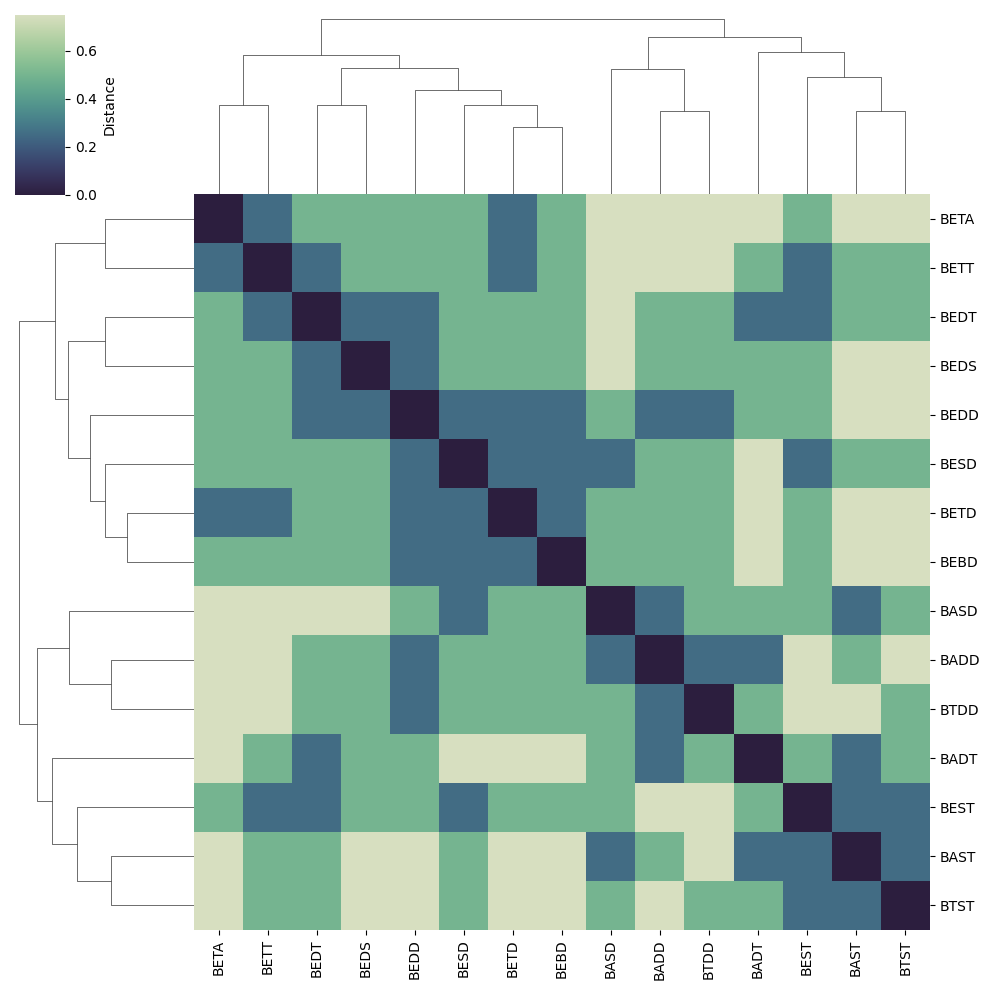

In [12]:
graph_clustermap = model.clustermap(    
        # Create a heatmap and dendrogram for pathogen genomes in data passed
    'fitness_function_mutation_example_clustermap.png', 
        # file path, name, and extension to save plot under
    data,
        # dataframe with model history as produced by saveToDf function
    save_data_to_file='fitness_function_mutation_example_pairwise_distances.csv',
        # file path, name, and extension to save data under
    num_top_sequences=15,
        # how many sequences to include in matrix
    track_specific_sequences=['BADD']
        # specific sequences to include in matrix
    )

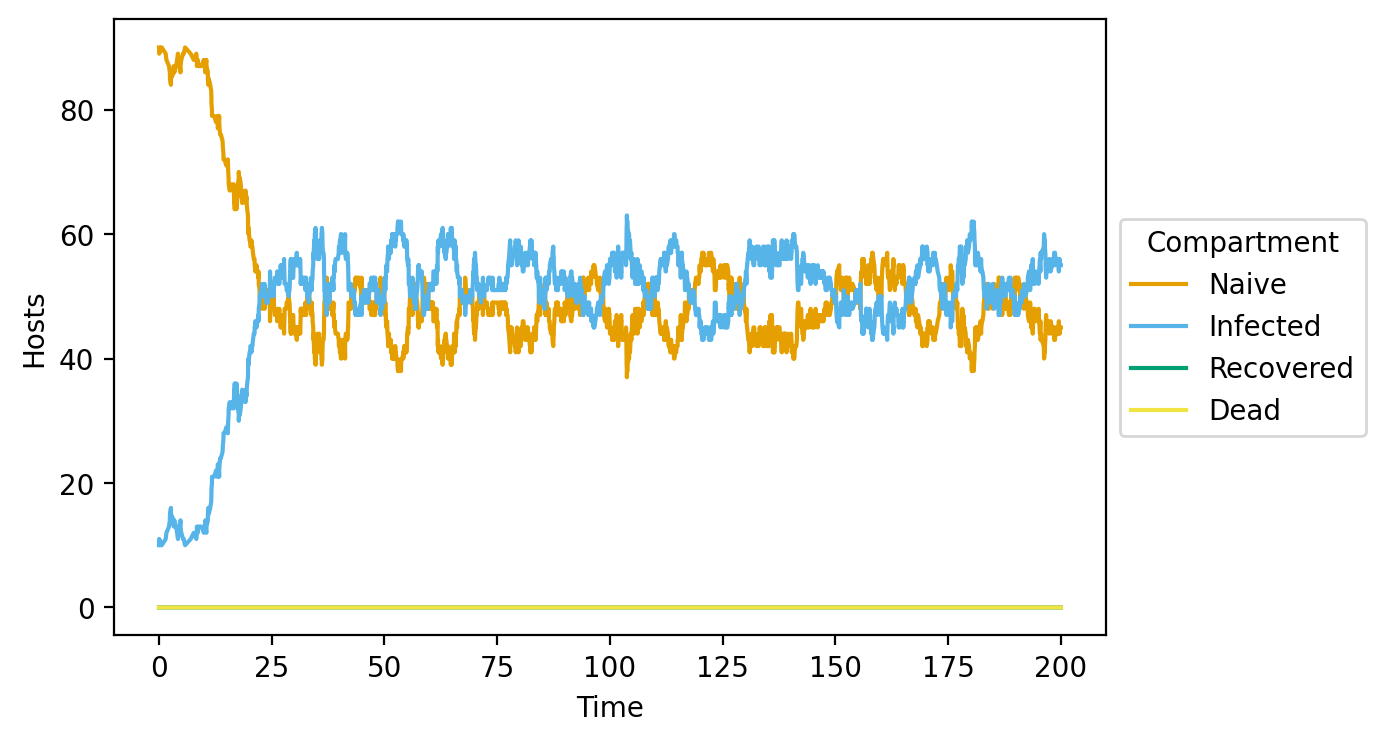

In [13]:
graph_compartments = model.compartmentPlot(
        # Create plot with number of naive, infected, recovered, dead hosts/vectors vs. time.
    'fitness_function_example_reassortment_compartments.png', 
        # file path, name, and extension to save plot under
    data
        # dataframe with model history as produced by saveToDf function
    )